
# Geração de Dados Sintéticos para Avaliação de Robustez

Este notebook mostra como gerar dados sintéticos plausíveis a partir do dataset clínico tabular,
utilizando **Gaussian Copula** e **CTGAN** (quando disponível). O objetivo é:

- Aumentar a variabilidade dos dados para testes de robustez.  
- Preservar distribuições estatísticas e dependências entre variáveis.  
- Comparar distribuições reais e sintéticas para validar a qualidade dos dados gerados.  


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer


# Config
plt.style.use("seaborn-v0_8")


In [9]:

# Carregar dataset real
CSV_PATH = "data/tecido_viavel_inviavel_arvore_decisao_correto_5.csv"
df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head()


(6900, 6)


,Tipo Do Tecido,Característica Do Tecido,Exsudato,Tipo Do Exsudato,Odor,Conduta
0,1,1,2,5,2,6
1,1,1,2,9,1,5
2,2,2,2,8,2,11
3,2,3,2,4,1,15
4,2,3,2,8,2,16


In [10]:

# Estatísticas descritivas
df.describe(include="all")


,Tipo Do Tecido,Característica Do Tecido,Exsudato,Tipo Do Exsudato,Odor,Conduta
count,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000
mean,1.652174,1.956522,1.913043,5.500000,1.391304,9.804348
std,0.476315,0.858689,0.281792,2.456315,0.488078,4.397054
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,4.000000,1.000000,6.000000
50%,2.000000,2.000000,2.000000,6.000000,1.000000,10.000000
75%,2.000000,3.000000,2.000000,8.000000,2.000000,15.000000
max,2.000000,3.000000,2.000000,9.000000,2.000000,16.000000


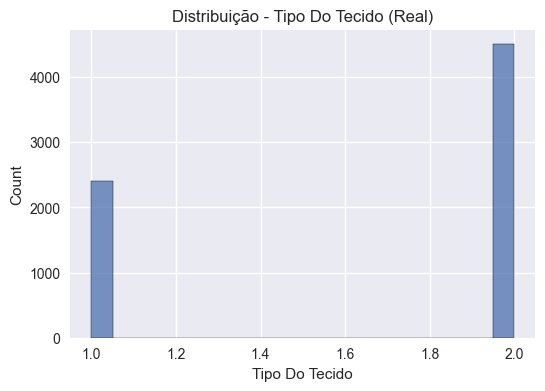

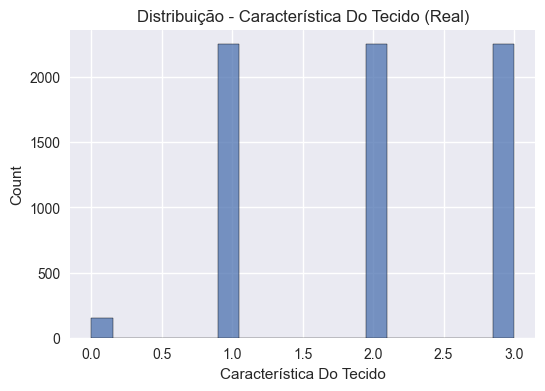

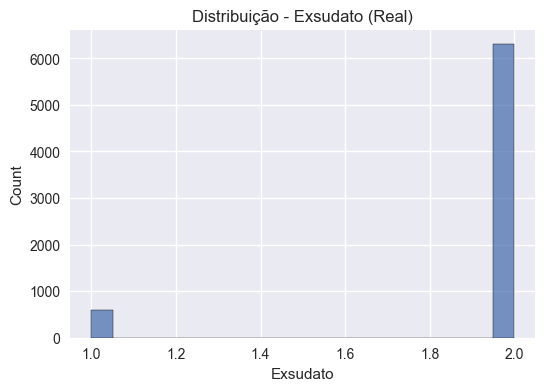

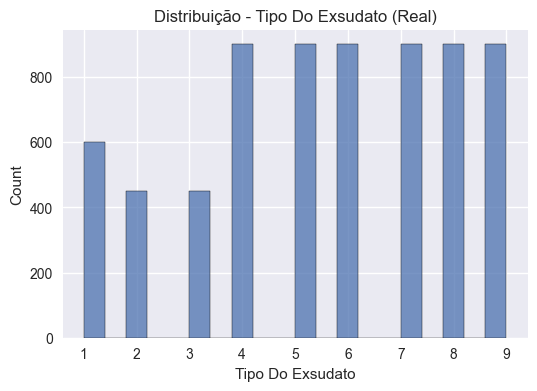

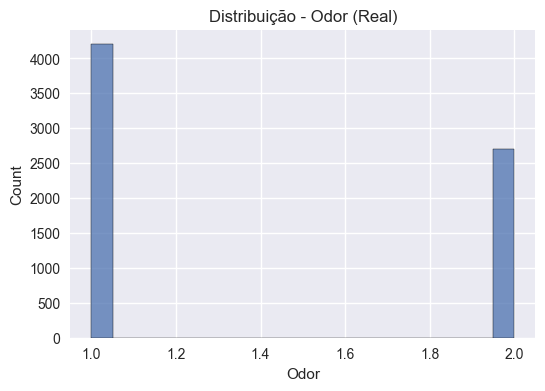

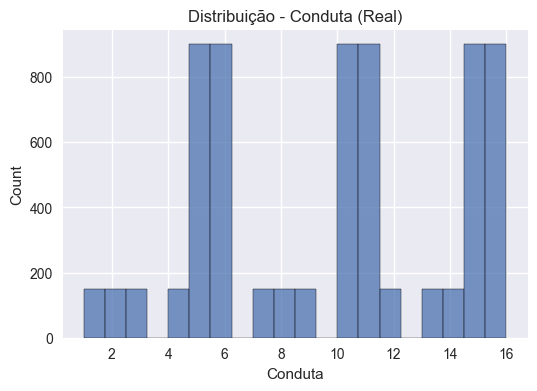

In [11]:

# Visualizar distribuições reais para algumas variáveis
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(f"Distribuição - {col} (Real)")
    plt.show()


In [13]:

# =============================
# Geração de dados sintéticos - Gaussian Copula
# =============================
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Definir os metadados a partir do DataFrame
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# Gaussian Copula Synthesizer
copula = GaussianCopulaSynthesizer(metadata)
copula.fit(df)

df_synth_copula = copula.sample(num_rows=len(df))
df_synth_copula.head()



c:\Users\niels\anaconda3\envs\GPU\lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\niels\anaconda3\envs\GPU\lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,Tipo Do Tecido,Característica Do Tecido,Exsudato,Tipo Do Exsudato,Odor,Conduta
0,2,3,2,4,1,15
1,2,1,2,7,1,14
2,2,3,2,4,2,13
3,2,1,2,1,2,12
4,2,0,2,4,2,15


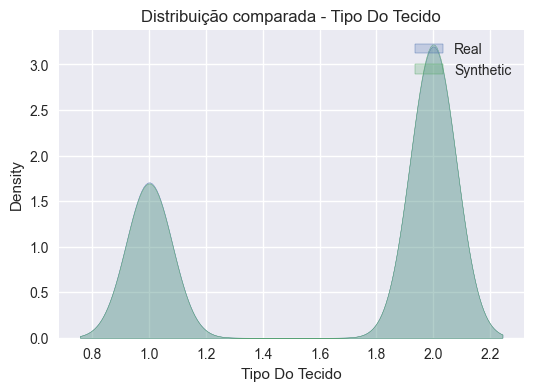

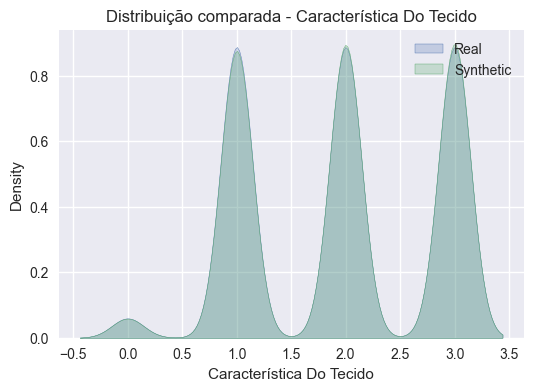

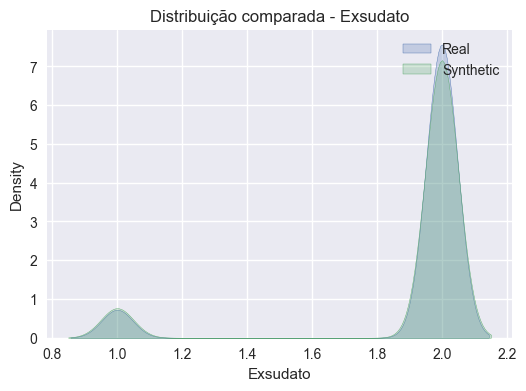

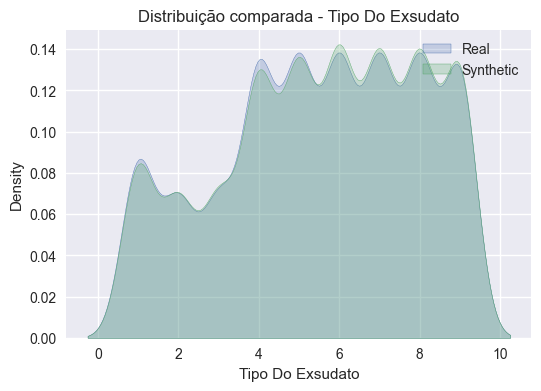

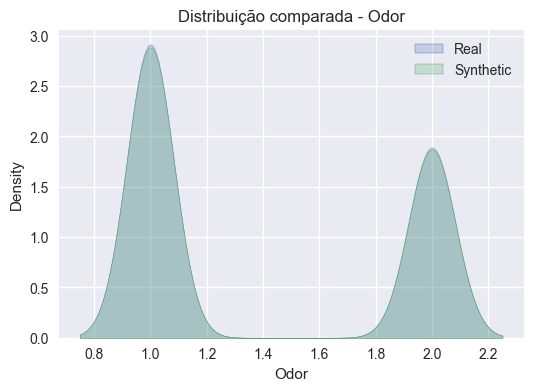

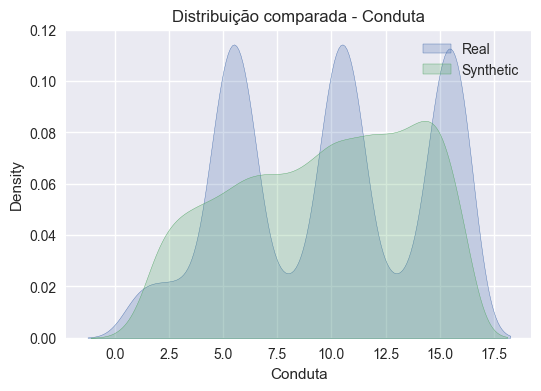

In [14]:

# Comparar distribuições reais vs sintéticas (Copula)
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], label="Real", fill=True)
    sns.kdeplot(df_synth_copula[col], label="Synthetic", fill=True)
    plt.title(f"Distribuição comparada - {col}")
    plt.legend()
    plt.show()


In [16]:

# =============================
# Geração de dados sintéticos - CTGAN
# =============================
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Criar metadados
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# CTGAN Synthesizer
ctgan = CTGANSynthesizer(metadata, epochs=50)
ctgan.fit(df)

df_synth_ctgan = ctgan.sample(num_rows=len(df))
df_synth_ctgan.head()



df_synth_ctgan = ctgan.sample(num_rows=len(df))
print("Synthetic CTGAN:", df_synth_ctgan.shape)
df_synth_ctgan.head()


c:\Users\niels\anaconda3\envs\GPU\lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\niels\anaconda3\envs\GPU\lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Synthetic CTGAN: (6900, 6)


,Tipo Do Tecido,Característica Do Tecido,Exsudato,Tipo Do Exsudato,Odor,Conduta
0,2,3,2,4,2,12
1,1,1,2,1,1,6
2,1,2,2,1,1,1
3,2,3,2,6,2,16
4,2,2,2,7,2,5


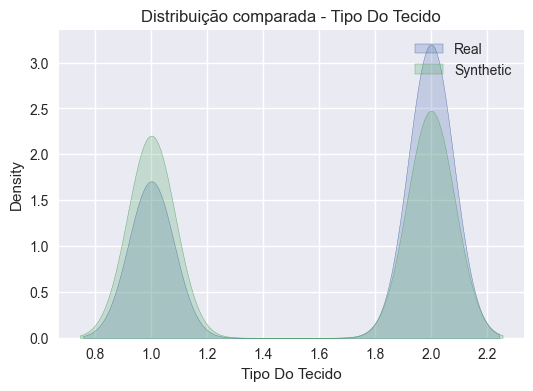

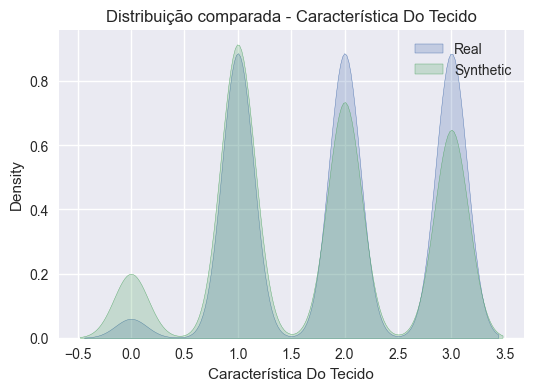

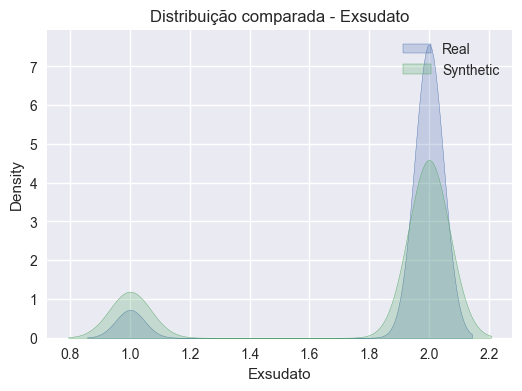

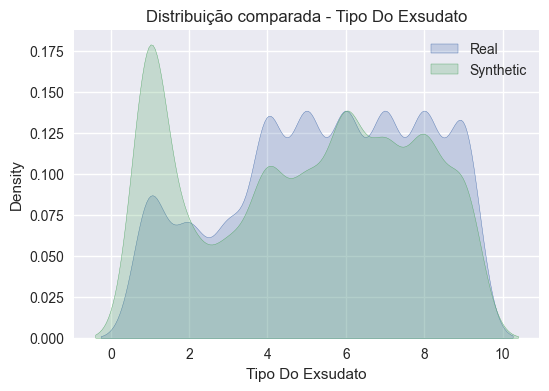

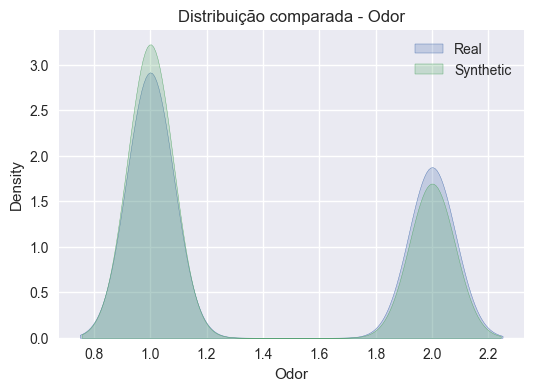

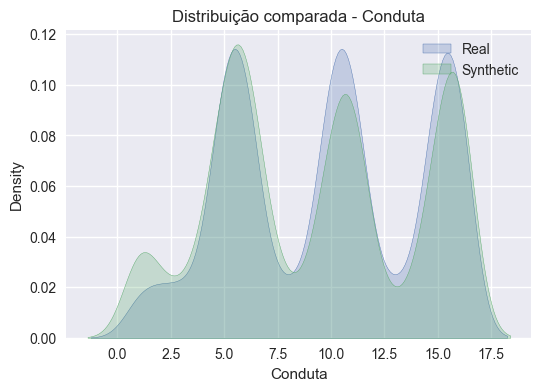

In [17]:

# Comparar distribuições reais vs sintéticas (CTGAN)
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], label="Real", fill=True)
    sns.kdeplot(df_synth_ctgan[col], label="Synthetic", fill=True)
    plt.title(f"Distribuição comparada - {col}")
    plt.legend()
    plt.show()


In [18]:

# Salvar dados sintéticos para uso posterior
df_synth_copula.to_csv("data/synthetic_copula.csv", index=False)
df_synth_ctgan.to_csv("data/synthetic_ctgan.csv", index=False)
print("Arquivos salvos: synthetic_copula.csv, synthetic_ctgan.csv")


Arquivos salvos: synthetic_copula.csv, synthetic_ctgan.csv
